In [22]:
# @title Welcome

from IPython.display import HTML

HTML('''
<div style="padding: 20px; background: linear-gradient(90deg, #a64ac9, #ff66b2); color: white; text-align: center; border-radius: 10px; font-size: 28px; font-weight: bold;">
  iAAA: Mathematics For Machine Learning
</div>
''')

### 📝 Notebook Topic: *Correlation Analysis & Regression*  
👨‍🏫 Lecturer: *Hadi Asheri*  
📅 Date: *[YYYY-MM-DD]*


---

In [23]:
# @title Section 1: Residual Vs. Predictions
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 1: Residual Vs. Predictions
</div>
''')

<h1 style='text-align: right;'>
مثال نموار پراکندگی باقیمانده در مقابل پیش بینی
</h1>

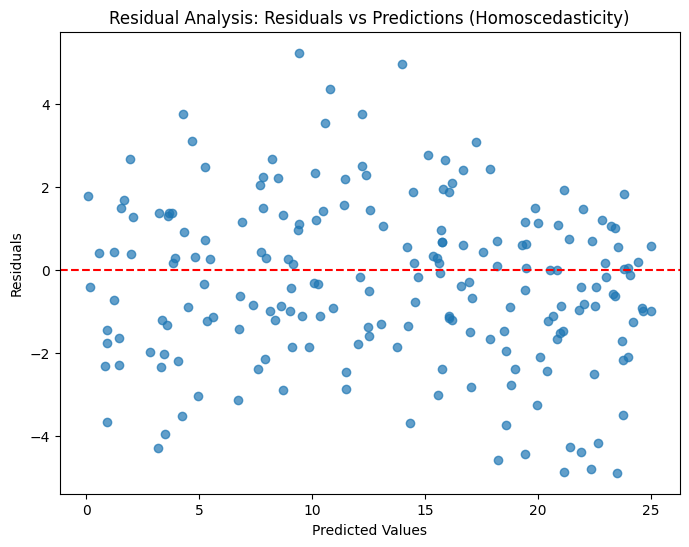

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data with homogeneous variance (homoscedasticity)
np.random.seed(44)
X = np.random.rand(1000, 1) * 10
y = 2.5 * X + np.random.randn(1000, 1) * 2  # Constant noise, independent of X

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plot residuals vs predictions to visualize homogeneous variance
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero residual
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis: Residuals vs Predictions (Homoscedasticity)")
plt.show()


<h1 style='text-align: right;'>
عدم برقراری فرض خطی بودن
</h1>

In [25]:
# @title Section 2: When Linearity Assumption Fails!
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 2: When Linearity Assumption Fails!
</div>
''')

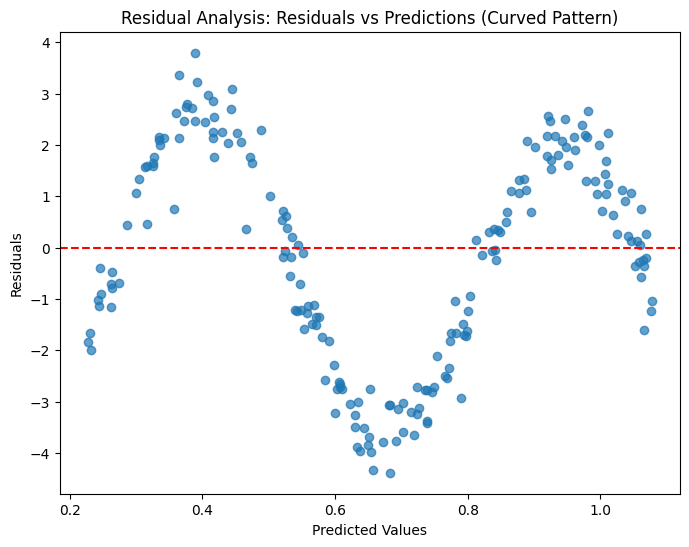

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.random.rand(1000, 1) * 10
y = 3 * np.sin(X) + np.random.randn(1000, 1) * 0.5  # Sinusoidal pattern with noise

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model (despite non-linear pattern)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plot residuals vs predictions to visualize curved/swirl patterns
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero residual
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis: Residuals vs Predictions (Curved Pattern)")
plt.show()


<h1 style='text-align: right;'>
برقراری استقلال خطاها
</h1>

In [27]:
# @title Section 3: Independent Errors
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 3: Independent Errors
</div>
''')

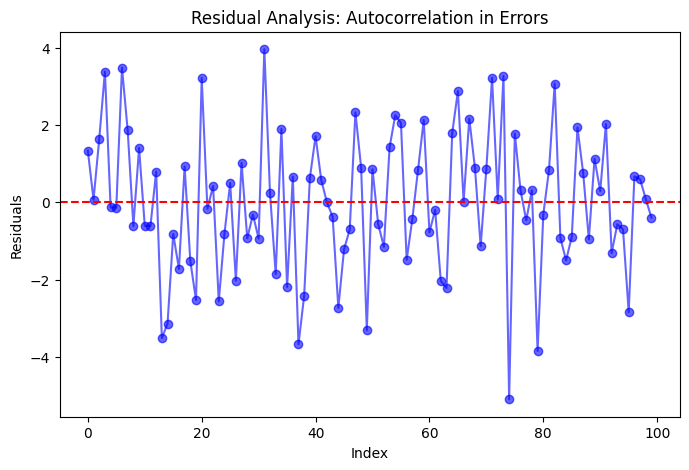

Durbin-Watson Statistic: 2.04 (values < 2 suggest autocorrelation)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic independent errors
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3 * X + 5 + np.random.normal(0, 2, size=len(X))  # Independent normal errors

# Fit linear regression model
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X).fit()
residuals = model.resid

# Residual plot
plt.figure(figsize=(8, 5))
plt.plot(residuals, marker='o', linestyle='-', color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residual Analysis: Autocorrelation in Errors')
plt.show()

# Autocorrelation test (Durbin-Watson statistic)
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat:.2f} (values < 2 suggest autocorrelation)')



<h1 style='text-align: right;'>
عدم برقراری استقلال خطاها
</h1>

In [29]:
# @title Section 4: Autocorrelated Errors
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 4: Autocorrelated Errors!
</div>
''')

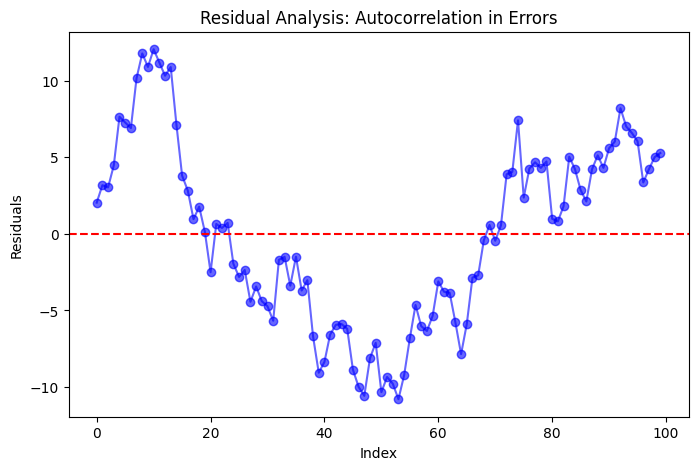

Durbin-Watson Statistic: 0.09 (values < 2 suggest autocorrelation)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data with autocorrelated errors
np.random.seed(42)
X = np.linspace(0, 10, 100)
errors = np.zeros(100)
rho = 0.99  # Autocorrelation coefficient
for i in range(1, 100):
    errors[i] = rho * errors[i-1] + np.random.normal(0, 2)  # AR(1) process

y = 3 * X + 5 + errors  # Errors are correlated

# Fit linear regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

# # Residual plot
# plt.figure(figsize=(8, 5))
# plt.scatter(X[:, 1], residuals, color='blue', alpha=0.6)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('X')
# plt.ylabel('Residuals')
# plt.title('Residual Analysis: Independence of Errors')
# plt.show()

# # Autocorrelation test (Durbin-Watson statistic)
# durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
# print(f'Durbin-Watson Statistic: {durbin_watson_stat:.2f}')

# Residual plot
plt.figure(figsize=(8, 5))
plt.plot(residuals, marker='o', linestyle='-', color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residual Analysis: Autocorrelation in Errors')
plt.show()

# Autocorrelation test (Durbin-Watson statistic)
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat:.2f} (values < 2 suggest autocorrelation)')


<h1 style='text-align: right;'>
عدم برقراری همگنی واریانس
</h1>

In [31]:
# @title Section 5: Non-Homogeneous Variance
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 5: Non-Homogeneous Variance
</div>
''')

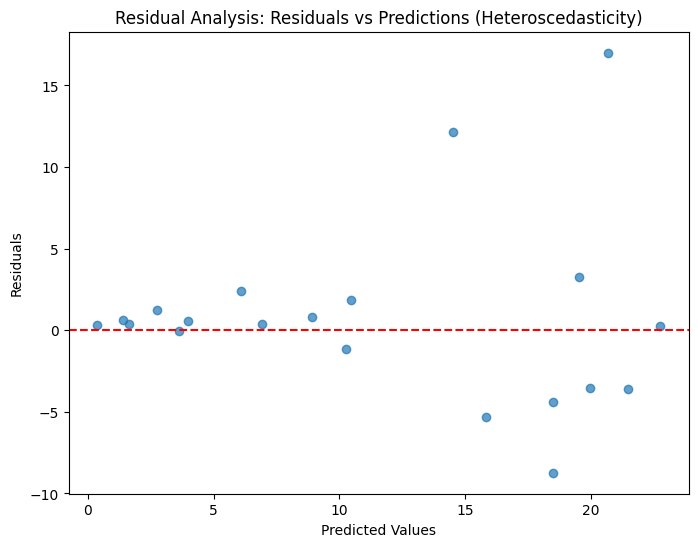

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data with non-homogeneous variance (heteroscedasticity)
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + (np.random.randn(100, 1) * X)  # Residual spread increases with X (heteroscedasticity)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plot residuals vs predictions to visualize variance non-homogeneity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero residual
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis: Residuals vs Predictions (Heteroscedasticity)")
plt.show()


<h1 style='text-align: right;'>
نمودارهای هیستوگرام و
$QQ$
مقادیر باقیمانده
</h1>

In [33]:
# @title Section 6: Residual Histograms & QQ Plots
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 6: Residual Histograms & QQ Plots
</div>
''')

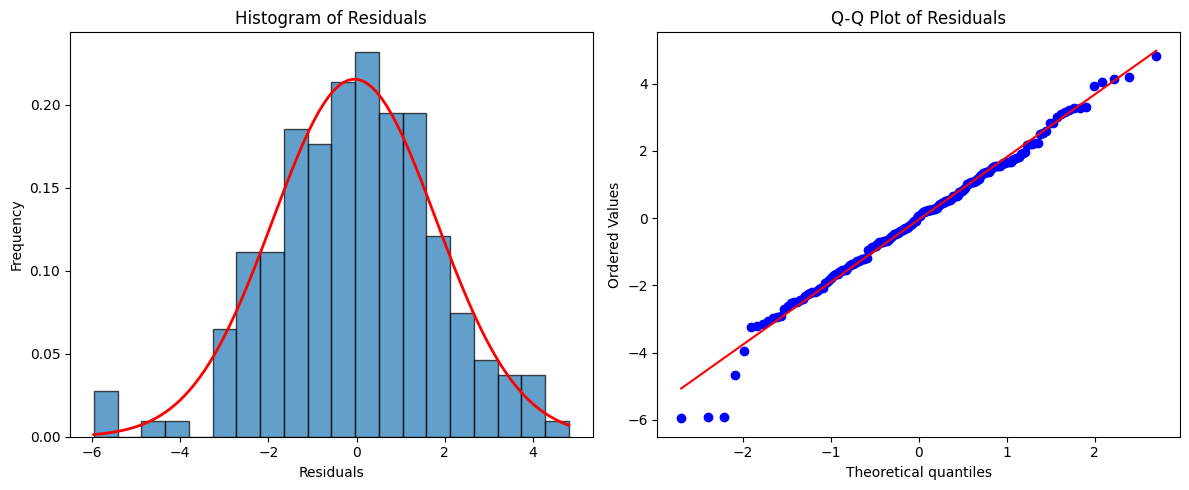

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data where residuals follow a normal distribution
np.random.seed(42)
X = np.random.rand(1000, 1) * 1
y = 2.5 * X + np.random.randn(1000, 1) * 2  # Normally distributed residuals

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute residuals
residuals = (y_test - y_pred).flatten()

# Plot histogram of residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")

# Overlay normal distribution curve
x_vals = np.linspace(min(residuals), max(residuals), 100)
plt.plot(x_vals, stats.norm.pdf(x_vals, np.mean(residuals), np.std(residuals)), color='red', lw=2)

# Plot Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.savefig("qq.png")
plt.show()


<h1 style='text-align: right;'>
نمودارهای هیستوگرام و
$QQ$
 و مقادیر باقیمانده
و عدم برقراری فرض نرمال بودن
</h1>

In [35]:
# @title Section 7: Residual Histograms & QQ Plots When Data isn't Normal
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 7: Residual Histograms & QQ Plots When Data isn't Normal
</div>
''')

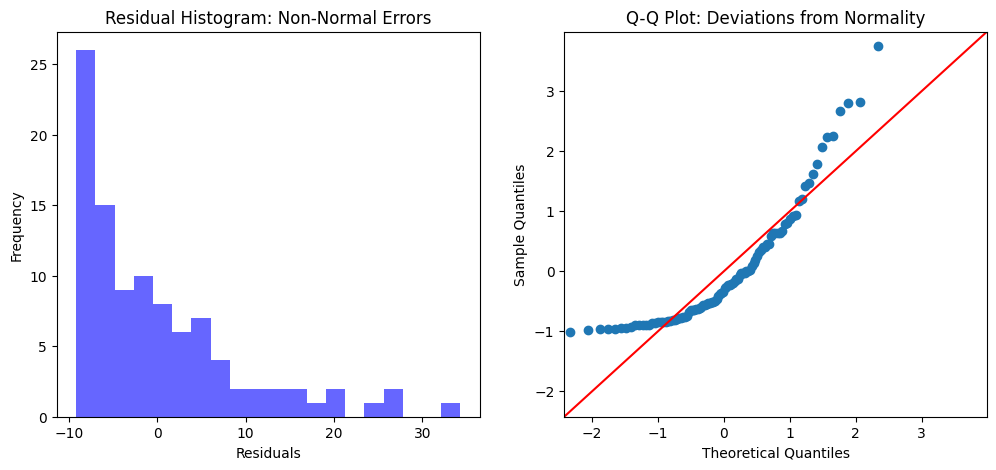

Shapiro-Wilk Test p-value: 0.0000 (p-value < 0.05 suggests non-normality)


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# Generate synthetic data with non-normal errors
np.random.seed(42)
X = np.linspace(0, 10, 100)
errors = np.random.exponential(scale=10, size=100)  # Exponential errors (right-skewed)
y = 3 * X + 5 + errors

# Fit linear regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

# Residual histogram and Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of residuals
ax[0].hist(residuals, bins=20, color='blue', alpha=0.6)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Residual Histogram: Non-Normal Errors')

# Q-Q plot
sm.qqplot(residuals, stats.norm, fit=True, line='45', ax=ax[1])
ax[1].set_title('Q-Q Plot: Deviations from Normality')

plt.show()

# Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f} (p-value < 0.05 suggests non-normality)')


<h1 style='text-align: right;'>
تبدیل متغیر
</h1>

In [37]:
# @title Section 8: Variable Transformation
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 8: Variable Transformation
</div>
''')

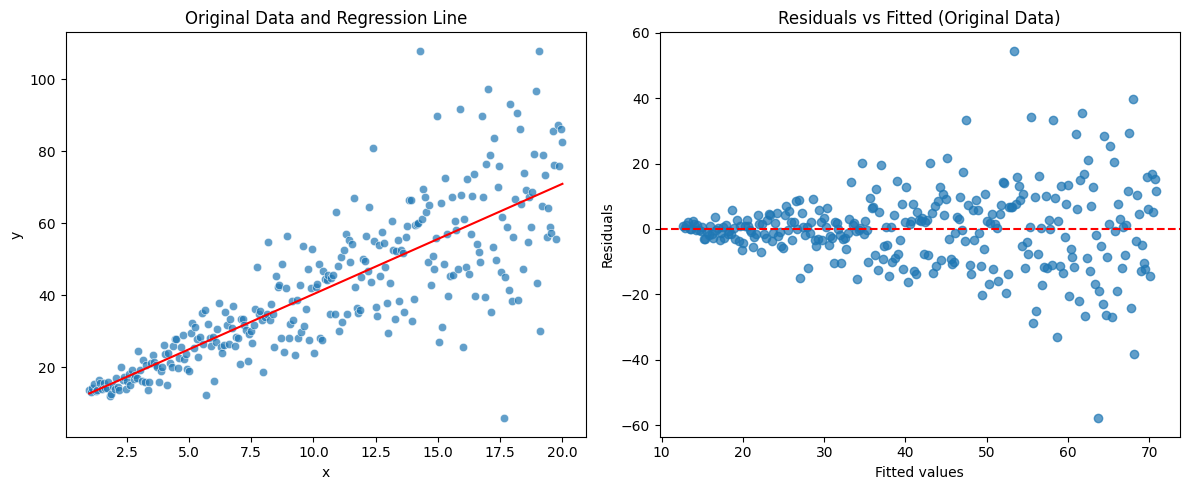

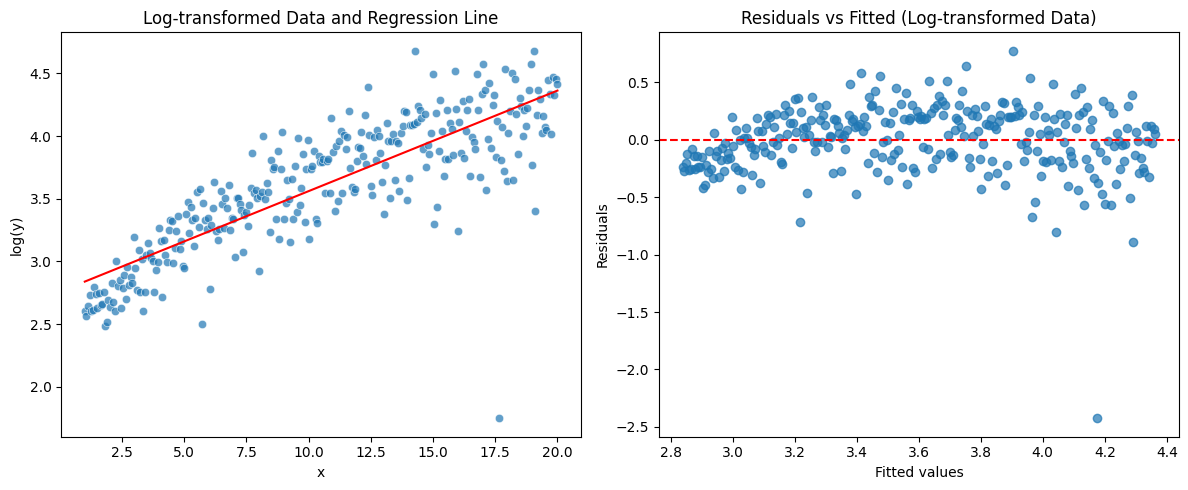

In [38]:
# تبدیل متغیر
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Set a seed for reproducibility
np.random.seed(42)

# -------------------------
# Step 1: Simulate heteroscedastic data
# -------------------------
# Generate 300 data points for predictor x
n = 300
x = np.linspace(1, 20, n)

# Define a true linear relationship: y = 3*x + 10
true_y = 3 * x + 10

# Generate errors whose standard deviation increases with x,
# which creates heteroscedasticity (variance increases with x)
errors = np.random.normal(0, x, n)  # The standard deviation of errors is proportional to x

# Create the response variable as the sum of the true relationship and the error
y = true_y + errors

# Create a pandas DataFrame with the predictor and response
data = pd.DataFrame({'x': x, 'y': y})

# -------------------------
# Step 2: Fit linear regression on original data
# -------------------------
# Using ordinary least squares (OLS) from statsmodels
model = smf.ols('y ~ x', data=data).fit()

# Print the summary of the original model
# print("Original Linear Regression Summary:")
# print(model.summary())

# -------------------------
# Step 3: Visualize original results and heteroscedasticity
# -------------------------
plt.figure(figsize=(12, 5))

# Scatter plot with the regression line on the original scale
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['x'], y=data['y'], alpha=0.7)  # Pass the actual series for x and y
# Use plt.plot instead of sns.lineplot so that x and the predictions match correctly
plt.plot(data['x'], model.predict(data), color='red')
plt.title('Original Data and Regression Line')
plt.xlabel("x")
plt.ylabel("y")

# Residuals vs. fitted values plot to check for heteroscedasticity
plt.subplot(1, 2, 2)
plt.scatter(model.fittedvalues, model.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (Original Data)')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# -------------------------
# Step 4: Apply variable transformation (log-transformation on y)
# -------------------------
# Ensure that all y values are positive before applying log transformation.
if (data['y'] <= 0).any():
    min_val = data['y'].min()
    data['y_shifted'] = data['y'] - min_val + 1  # Shift to make all values positive
else:
    data['y_shifted'] = data['y']

# Create a new column for the log-transformed response
data['log_y'] = np.log(data['y_shifted'])

# Fit a linear regression model using the log-transformed response variable
model_log = smf.ols('log_y ~ x', data=data).fit()

# Print the summary of the log-transformed model
# print("\nLog-transformed Linear Regression Summary:")
# print(model_log.summary())

# -------------------------
# Step 5: Visualize transformed results and check for reduced heteroscedasticity
# -------------------------
plt.figure(figsize=(12, 5))

# Scatter plot with the regression line for log-transformed data
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['x'], y=data['log_y'], alpha=0.7)
plt.plot(data['x'], model_log.predict(data), color='red')
plt.title('Log-transformed Data and Regression Line')
plt.xlabel("x")
plt.ylabel("log(y)")

# Residuals vs. fitted values plot for the log-transformed model
plt.subplot(1, 2, 2)
plt.scatter(model_log.fittedvalues, model_log.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (Log-transformed Data)')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


<h1 style='text-align: right;'>
رگرسیون چند‌جمله‌ای
</h1>

In [39]:
# @title Section 9: Polynomial Regression
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 9: Polynomial Regression
</div>
''')

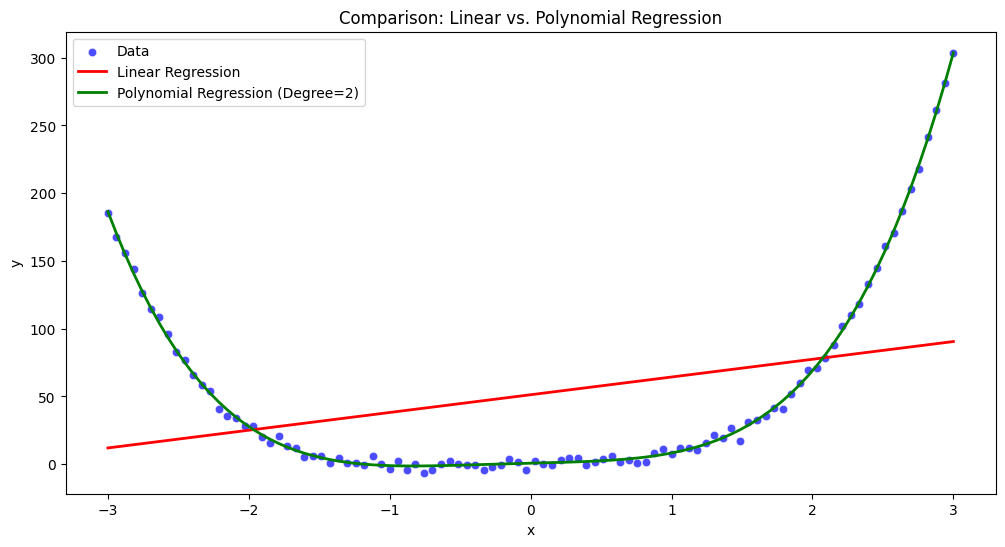

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Set a seed for reproducibility
np.random.seed(42)

# -------------------------------------
# Step 1: Generate Nonlinear (Quadratic) Data
# -------------------------------------
# Create 100 evenly spaced values between -3 and 3
x = np.linspace(-3, 3, 100)
# Define a quadratic relationship: y = 1 + 2*x + 3*x^2 plus some random noise
y = 1 + 2*x + 2*x**3 + 3*x**4 + np.random.normal(0, 3, size=x.shape)
# y = 1 + 2*x + 3*x**2 + np.random.normal(0, 3, size=x.shape)

# Reshape x to a 2D array needed for sklearn models
x = x.reshape(-1, 1)

# -------------------------------------
# Step 2: Fit a Linear Regression Model
# -------------------------------------
# The simple linear regression model captures only a straight line.
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# -------------------------------------
# Step 3: Fit a Polynomial Regression Model
# -------------------------------------
# To capture the curvature, generate polynomial features
poly = PolynomialFeatures(degree=6)  # Degree 2 polynomial features capture quadratic relationships
x_poly = poly.fit_transform(x)

# Fit the polynomial regression model on the transformed features
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# -------------------------------------
# Step 4: Visualize the Results
# -------------------------------------
plt.figure(figsize=(12, 6))

# Plot the raw data
sns.scatterplot(x=x.flatten(), y=y, color='blue', label='Data', alpha=0.7)

# Plot the simple linear regression line (which fails to capture the non-linear trend)
plt.plot(x, y_pred_linear, label='Linear Regression', color='red', linewidth=2)

# Plot the fitted polynomial regression curve
plt.plot(x, y_pred_poly, label='Polynomial Regression (Degree=2)', color='green', linewidth=2)

# Formatting the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison: Linear vs. Polynomial Regression')
plt.legend()
plt.show()


<h1 style='text-align: right;'>
رگرسیون لجستیک
</h1>

In [41]:
# @title Section 10: Logistic Regression
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 10: Logistic Regression
</div>
''')

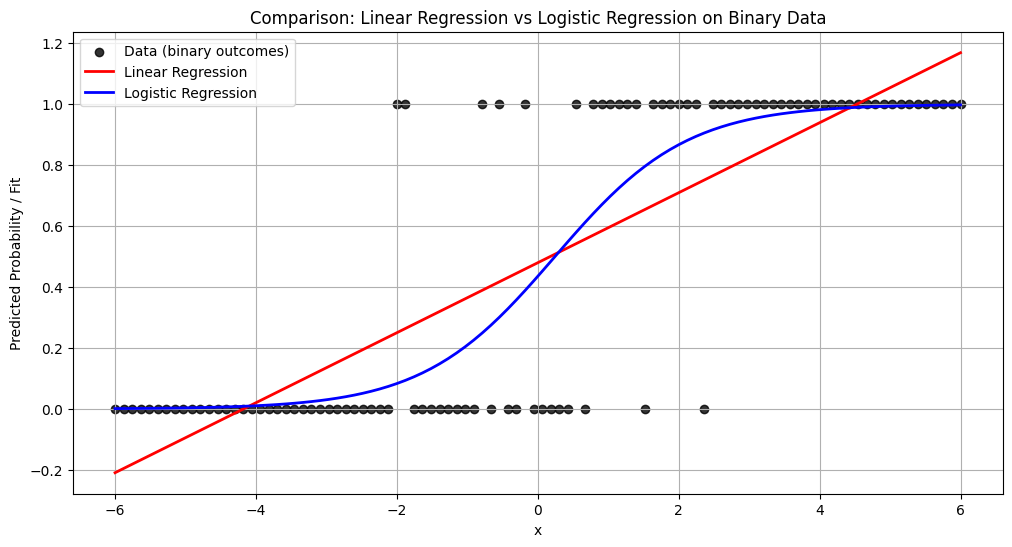

In [42]:

# رگرسیون لجستیک
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Set seed for reproducibility
np.random.seed(42)

# -------------------------------
# Step 1: Generate Synthetic Binary Data
# -------------------------------
# Generate 100 evenly spaced values between -6 and 6 for the predictor variable
x = np.linspace(-6, 6, 100)

# Define the true probability using the logistic (sigmoid) function
# p = 1 / (1 + exp(-x))
p_true = 1 / (1 + np.exp(-x))

# For each x, generate a binary outcome (0 or 1) using a Bernoulli trial with probability p_true
y = np.random.binomial(1, p_true)

# Reshape x as required for scikit-learn models (n_samples x n_features)
x = x.reshape(-1, 1)

# -------------------------------
# Step 2: Fit a Linear Regression Model
# -------------------------------
# A linear regression on binary data does not naturally restrict predictions to the [0, 1] range.
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_lin = linear_model.predict(x)

# -------------------------------
# Step 3: Fit a Logistic Regression Model
# -------------------------------
# Logistic regression fits the correct S-shaped model for a binary outcome.
logistic_model = LogisticRegression()
logistic_model.fit(x, y)
# Predict probabilities for the positive class (class 1)
y_pred_log = logistic_model.predict_proba(x)[:, 1]

# -------------------------------
# Step 4: Visualize the Results
# -------------------------------
plt.figure(figsize=(12, 6))

# Scatter plot of the binary data (0/1)
plt.scatter(x, y, color='black', label='Data (binary outcomes)', alpha=0.8)

# Plot the predictions from the linear regression model
plt.plot(x, y_pred_lin, color='red', label='Linear Regression', linewidth=2)

# Plot the predicted probabilities from logistic regression
plt.plot(x, y_pred_log, color='blue', label='Logistic Regression', linewidth=2)

# Formatting the plot
plt.xlabel('x')
plt.ylabel('Predicted Probability / Fit')
plt.title('Comparison: Linear Regression vs Logistic Regression on Binary Data')
plt.legend()
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
رگرسیون نمایی
</h1>

In [43]:
# @title Section 11: Exponential Regression
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 11: Exponential Regression
</div>
''')

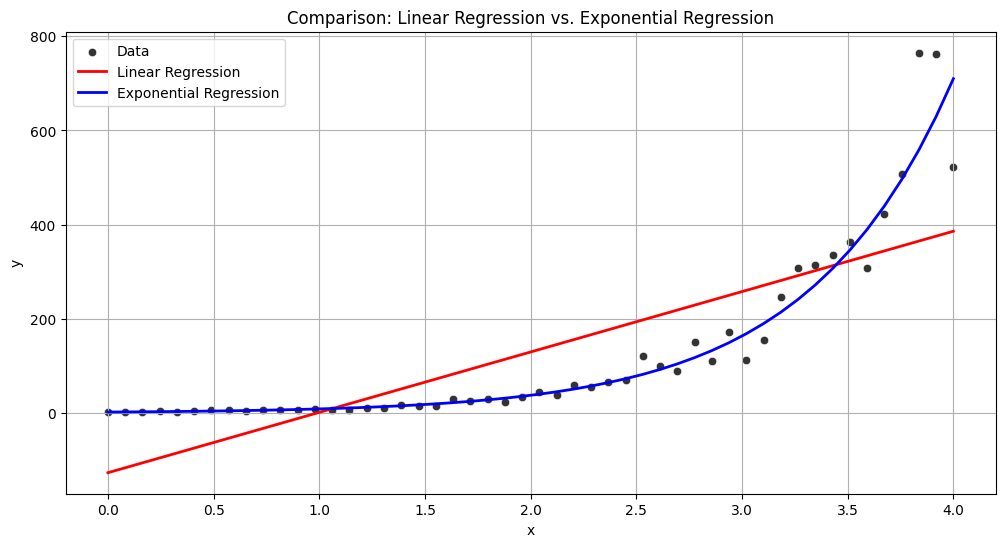

In [44]:
# رگرسیون نمایی
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# -------------------------------
# Step 1: Generate Synthetic Exponential Data
# -------------------------------
# Set a seed for reproducibility
np.random.seed(42)

# Generate predictor values: 50 points between 0 and 4
x = np.linspace(0, 4, 50)
# Define a true exponential relationship: y = 2 * exp(0.5 * x)
true_y = 2 * np.exp(1.5 * x)
# Add some multiplicative noise to simulate real data behavior (ensure y remains positive)
noise = np.random.normal(0, 0.2, size=x.shape)
y = true_y * (1 + noise)

# -------------------------------
# Step 2: Fit a Simple Linear Regression Model
# -------------------------------
# Reshape x for scikit-learn (n_samples, n_features)
x_reshape = x.reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(x_reshape, y)
y_pred_linear = linear_model.predict(x_reshape)

# -------------------------------
# Step 3: Fit an Exponential Regression Model
# -------------------------------
# The idea behind exponential regression is to linearize the relationship by taking the logarithm of y.
# Note: y values must be positive (which is ensured in our simulation).
log_y = np.log(y)

# Fit a linear regression model on x and log(y)
exp_model = LinearRegression()
exp_model.fit(x_reshape, log_y)
# Predict log(y)
log_y_pred = exp_model.predict(x_reshape)
# Back-transform predictions to the original scale using the exponential function
y_pred_exp = np.exp(log_y_pred)

# -------------------------------
# Step 4: Visualize the Results
# -------------------------------
plt.figure(figsize=(12, 6))

# Plot the raw data
sns.scatterplot(x=x, y=y, color='black', label='Data', alpha=0.8)

# Plot the linear regression line (which fails to capture the exponential pattern)
plt.plot(x, y_pred_linear, label='Linear Regression', color='red', linewidth=2)

# Plot the exponential regression curve (capturing the underlying exponential trend)
plt.plot(x, y_pred_exp, label='Exponential Regression', color='blue', linewidth=2)

# Formatting the visualization
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison: Linear Regression vs. Exponential Regression')
plt.legend()
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
رگرسیون شبکه عصبی
</h1>


In [45]:
# @title Section 12: Artificial Neural Network Regression
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 12: Artificial Neural Network Regression
</div>
''')

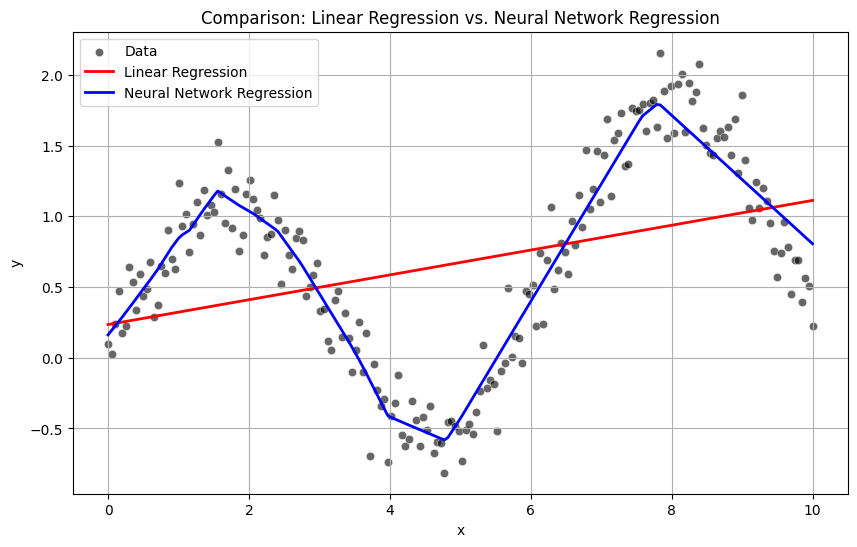

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# -------------------------------
# Step 1: Generate Synthetic Nonlinear Data
# -------------------------------
np.random.seed(42)
# Generate 200 evenly spaced values for x between 0 and 10
x = np.linspace(0, 10, 200)
# Create nonlinear relationship: y = sin(x) + 0.1*x plus some Gaussian noise
y = np.sin(x) + 0.1 * x + np.random.normal(0, 0.2, size=x.shape)

# Reshape x for scikit-learn (n_samples, n_features)
X = x.reshape(-1, 1)

# -------------------------------
# Step 2: Fit a Simple Linear Regression Model
# -------------------------------
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)

# -------------------------------
# Step 3: Fit a Neural Network Regression Model
# -------------------------------
# Here we use an MLPRegressor with two hidden layers (50 neurons each)
# You may adjust the parameters (hidden_layer_sizes, activation, max_iter, etc.) as needed.
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100),
                        activation='relu',
                        solver='adam',
                        max_iter=5000,
                        random_state=42)
nn_model.fit(X, y)
y_nn_pred = nn_model.predict(X)

# -------------------------------
# Step 4: Visualize the Results
# -------------------------------
plt.figure(figsize=(10, 6))
# Scatter plot of the synthetic data
sns.scatterplot(x=x, y=y, color='black', alpha=0.6, label="Data")
# Plot the linear regression predictions (a straight line)
plt.plot(x, y_lin_pred, label="Linear Regression", color='red', linewidth=2)
# Plot the neural network regression predictions (capturing the non-linearity)
plt.plot(x, y_nn_pred, label='Neural Network Regression', color='blue', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison: Linear Regression vs. Neural Network Regression")
plt.legend()
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
رگرسیون مقاوم
</h1>

In [47]:
# @title Section 13: Robust Regression
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 13: Robust Regression
</div>
''')

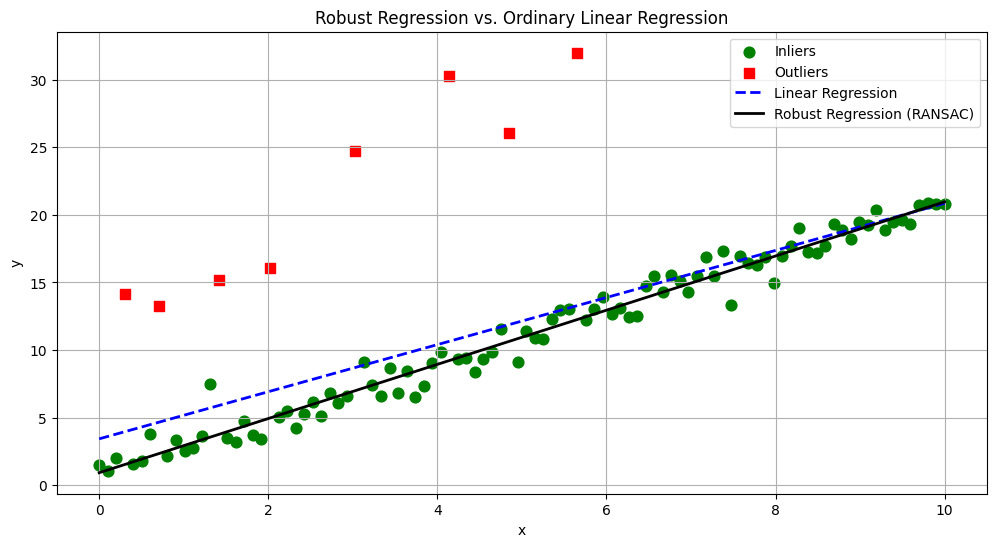

In [48]:
# رگرسیون مقاوم
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RANSACRegressor

# -------------------------------
# Step 1: Generate Synthetic Data with Outliers
# -------------------------------
np.random.seed(42)

# Generate 100 evenly spaced values for x between 0 and 10
n_samples = 100
x = np.linspace(0, 10, n_samples)
# True relationship: y = 2*x + 1
y_true = 2 * x + 1
# Add normal noise to the data
noise = np.random.normal(0, 1, size=n_samples)
y = y_true + noise

# Introduce outliers: randomly select 10% of the data and add large noise
n_outliers = int(0.1 * n_samples)
outlier_indices = np.random.choice(np.arange(n_samples), n_outliers, replace=False)
y[outlier_indices] += np.random.normal(15, 5, size=n_outliers)  # add a big positive jump

# Reshape x for scikit-learn (n_samples, n_features)
X = x.reshape(-1, 1)

# -------------------------------
# Step 2: Fit an Ordinary Linear Regression Model
# -------------------------------
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# -------------------------------
# Step 3: Fit a Robust Regression Model Using RANSAC
# -------------------------------
# Using the updated 'estimator' keyword instead of 'base_estimator'
ransac = RANSACRegressor(estimator=LinearRegression(),
                         max_trials=100,
                         min_samples=0.5,
                         residual_threshold=5.0,
                         random_state=42)
ransac.fit(X, y)
y_pred_ransac = ransac.predict(X)

# Identify inliers and outliers according to RANSAC
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

# -------------------------------
# Step 4: Visualize the Results
# -------------------------------
plt.figure(figsize=(12, 6))

# Plot inliers and outliers
plt.scatter(X[inlier_mask], y[inlier_mask], color='green', marker='o', label='Inliers', s=60)
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='s', label='Outliers', s=60)

# Plot the predictions of the ordinary linear regression
plt.plot(x, y_pred_linear, color='blue', linewidth=2, linestyle='--', label='Linear Regression')

# Plot the predictions of the robust RANSAC regression
plt.plot(x, y_pred_ransac, color='black', linewidth=2, label='Robust Regression (RANSAC)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Robust Regression vs. Ordinary Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


<h1 style='text-align: right;'>
داده پرت/تاثیرگذار
</h1>


In [49]:
# @title Section 14: Outliers
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 14: Outliers
</div>
''')

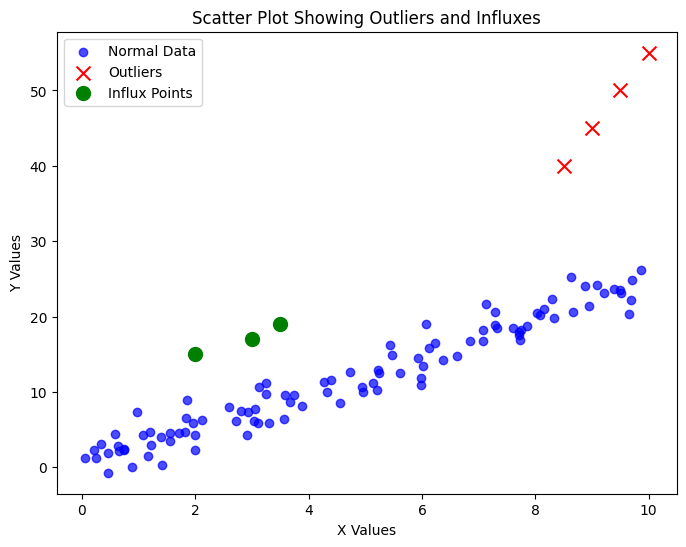

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # Linear trend with noise

# Introduce outliers (extreme values)
X_outliers = np.array([8.5, 9.0, 9.5, 10.0])  # High X values
y_outliers = np.array([40, 45, 50, 55])  # Extreme Y values

# Introduce influx points (unexpected shifts)
X_influx = np.array([2.0, 3.0, 3.5])  # Normal X values
y_influx = np.array([15, 17, 19])  # Higher than expected Y values

# Combine all data
X_all = np.vstack((X, X_outliers.reshape(-1, 1), X_influx.reshape(-1, 1)))
y_all = np.vstack((y, y_outliers.reshape(-1, 1), y_influx.reshape(-1, 1)))

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Normal Data", color="blue")
plt.scatter(X_outliers, y_outliers, marker="x", s=100, label="Outliers", color="red")
plt.scatter(X_influx, y_influx, marker="o", s=100, label="Influx Points", color="green")

plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot Showing Outliers and Influxes")
plt.legend()
plt.show()


<h1 style='text-align: right;'>
شاخصهای تشخیص نقاط پرت/تاثیرگذار
</h1>

In [51]:
# @title Section 15: Recognition of Outliers
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 15: Recognition of Outliers
</div>
''')

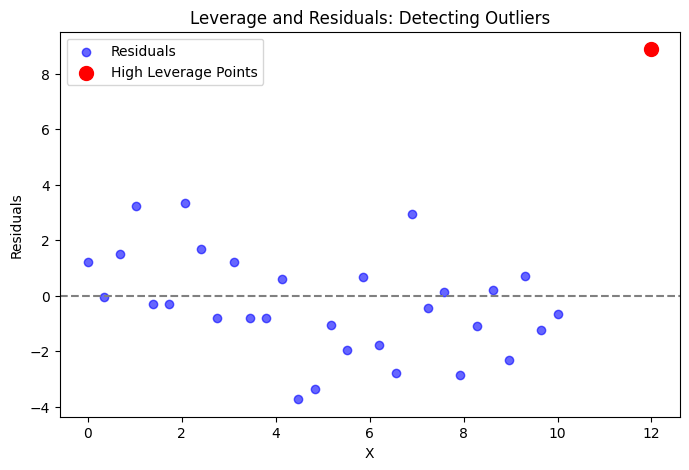

Point 30 (X=12.0, y=50.0): Leverage = 0.1781 (Possible Outlier)


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 30)
y = 3 * X + 5 + np.random.normal(0, 2, size=len(X))

# Introduce an outlier
X = np.append(X, [12])  # Outlier point
y = np.append(y, [50])  # Outlier response

# Fit linear regression model
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X).fit()
residuals = model.resid

# Compute leverage (hat matrix diagonal)
hat_matrix = X @ np.linalg.inv(X.T @ X) @ X.T
leverage = np.diag(hat_matrix)

# Identify high leverage points (threshold: twice the average leverage)
threshold = 2 * np.mean(leverage)
outliers = np.where(leverage > threshold)[0]

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 1], residuals, color='blue', alpha=0.6, label="Residuals")
plt.scatter(X[outliers, 1], residuals[outliers], color='red', label="High Leverage Points", marker='o', s=100)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Leverage and Residuals: Detecting Outliers')
plt.legend()
plt.show()

# Print leverage values for identified outliers
for i in outliers:
    print(f'Point {i} (X={X[i,1]}, y={y[i]}): Leverage = {leverage[i]:.4f} (Possible Outlier)')


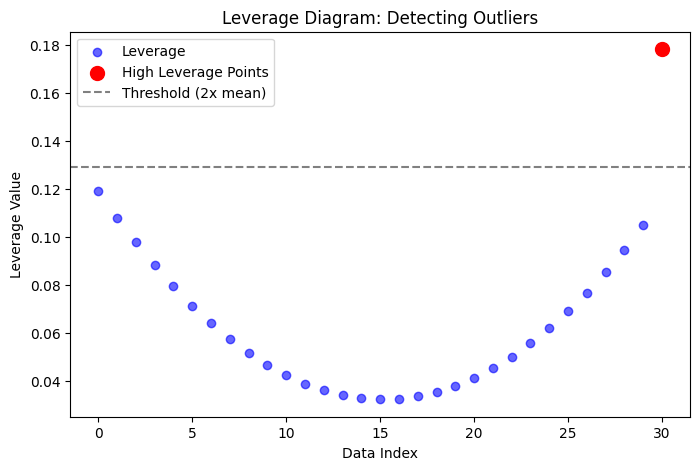

Point 30 (X=12.0, y=50.0): Leverage = 0.1781 (Possible Outlier)


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 30)
y = 3 * X + 5 + np.random.normal(0, 2, size=len(X))

# Introduce an outlier
X = np.append(X, [12])  # Outlier feature value
y = np.append(y, [50])  # Outlier response value

# Fit linear regression model
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X).fit()

# Compute leverage values using Hat Matrix
hat_matrix = X @ np.linalg.inv(X.T @ X) @ X.T
leverage = np.diag(hat_matrix)

# Define threshold for high leverage points
threshold = 2 * np.mean(leverage)
outliers = np.where(leverage > threshold)[0]

# Plot leverage values
plt.figure(figsize=(8, 5))
plt.scatter(range(len(leverage)), leverage, color='blue', alpha=0.6, label="Leverage")
plt.scatter(outliers, leverage[outliers], color='red', label="High Leverage Points", marker='o', s=100)
plt.axhline(y=threshold, color='gray', linestyle='--', label="Threshold (2x mean)")
plt.xlabel('Data Index')
plt.ylabel('Leverage Value')
plt.title('Leverage Diagram: Detecting Outliers')
plt.legend()
plt.show()

# Print high leverage points
for i in outliers:
    print(f'Point {i} (X={X[i,1]}, y={y[i]}): Leverage = {leverage[i]:.4f} (Possible Outlier)')


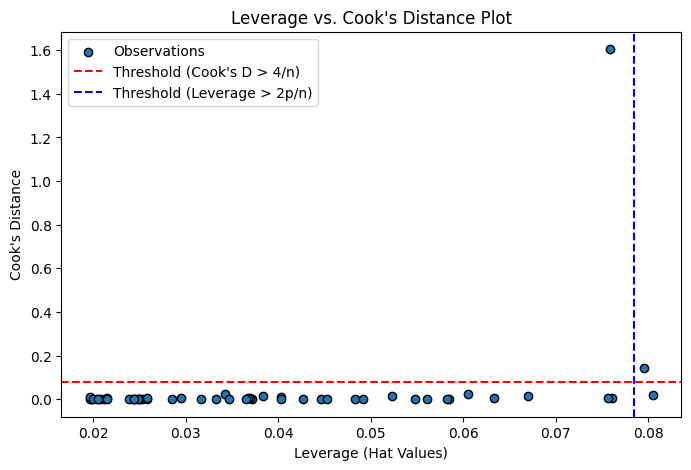

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50, 1) * 10  # Independent variable
y = 2.5 * X.squeeze() + np.random.randn(50) * 2  # Linear relation with noise

# Add an influential point
X = np.append(X, [[9.5]], axis=0)
y = np.append(y, [50])  # Outlier point

# Add constant term for statsmodels
X = sm.add_constant(X)

# Fit Linear Regression model
model = sm.OLS(y, X).fit()

# Compute influence measures
influence = model.get_influence()
leverage = influence.hat_matrix_diag  # Leverage values
cooks_d = influence.cooks_distance[0]  # Cook's Distance values

# Create Leverage vs. Influence plot
plt.figure(figsize=(8, 5))
plt.scatter(leverage, cooks_d, marker='o', edgecolors='black', label="Observations")
plt.xlabel("Leverage (Hat Values)")
plt.ylabel("Cook's Distance")
plt.axhline(y=4/len(y), color='red', linestyle='--', label="Threshold (Cook's D > 4/n)")
plt.axvline(x=2 * X.shape[1] / len(y), color='blue', linestyle='--', label="Threshold (Leverage > 2p/n)")
plt.title("Leverage vs. Cook's Distance Plot")
plt.legend()
plt.show()


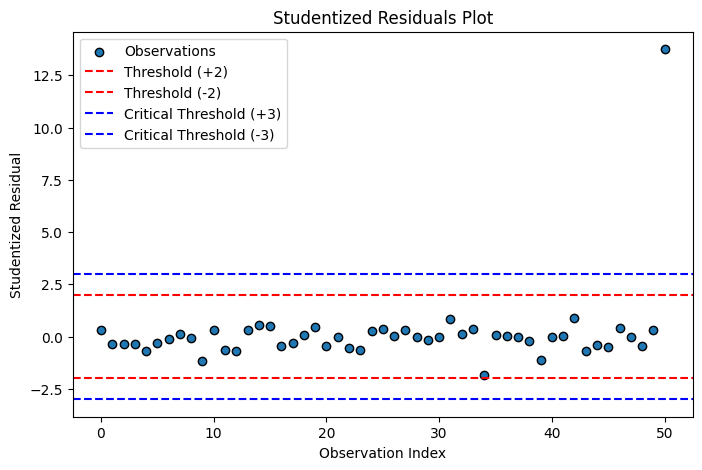

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50, 1) * 10  # Independent variable
y = 2.5 * X.squeeze() + np.random.randn(50) * 2  # Linear relation with noise

# Add an outlier
X = np.append(X, [[9.5]], axis=0)
y = np.append(y, [50])  # Outlier point

# Add constant term for statsmodels
X = sm.add_constant(X)

# Fit Linear Regression model
model = sm.OLS(y, X).fit()

# Compute Studentized Residuals
influence = model.get_influence()
studentized_residuals = influence.resid_studentized_external  # Studentized residuals

# Plot Studentized Residuals
plt.figure(figsize=(8, 5))
plt.scatter(range(len(studentized_residuals)), studentized_residuals, marker='o', edgecolors='black', label="Observations")
plt.axhline(y=2, color='red', linestyle='--', label="Threshold (+2)")
plt.axhline(y=-2, color='red', linestyle='--', label="Threshold (-2)")
plt.axhline(y=3, color='blue', linestyle='--', label="Critical Threshold (+3)")
plt.axhline(y=-3, color='blue', linestyle='--', label="Critical Threshold (-3)")
plt.xlabel("Observation Index")
plt.ylabel("Studentized Residual")
plt.title("Studentized Residuals Plot")
plt.legend()
plt.show()


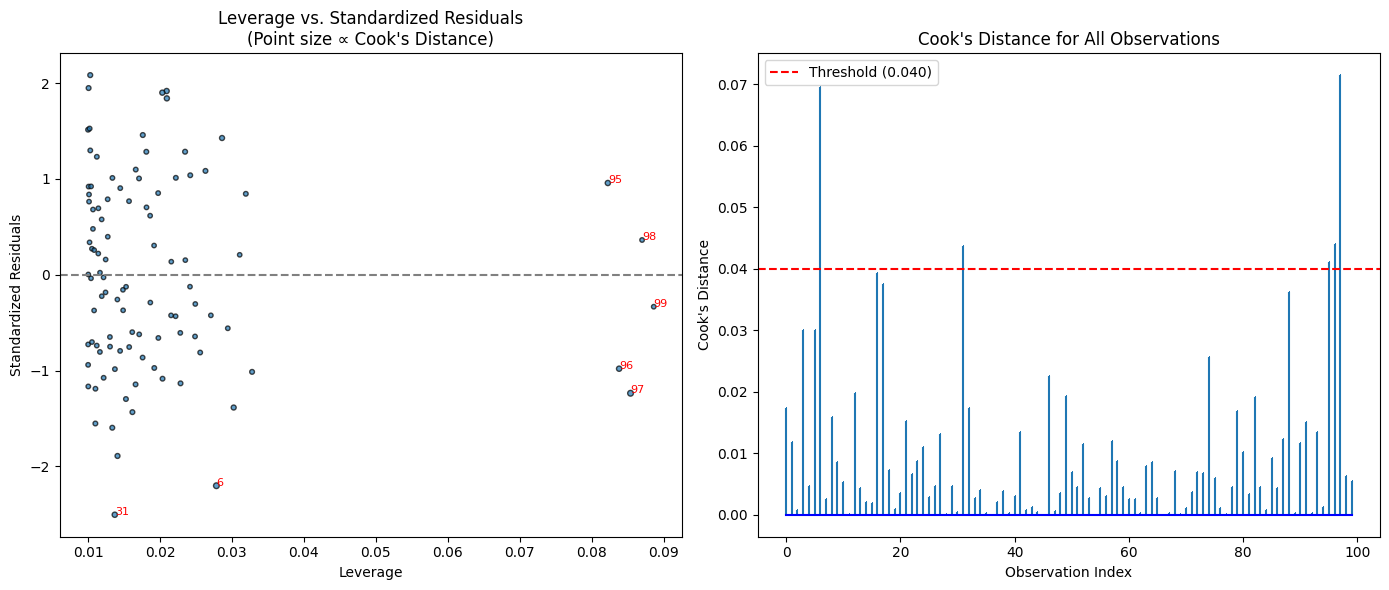

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ---------------------------------------------------
# 1. Simulate Data with a Few Influential Observations
# ---------------------------------------------------
np.random.seed(123)
n = 100
# Create a predictor x evenly spaced between 0 and 10.
x = np.linspace(0, 10, n)
# The true relationship: y = 2*x + noise.
noise = np.random.normal(0, 1, n)
y = 2 * x + noise

# Introduce a few influential observations by adding large errors to last few points.
x[95:] = x[95:] + 5    # Increase x-values for last few observations
y[95:] = y[95:] + 10   # Increase y-values for last few observations

# Build the DataFrame.
data = pd.DataFrame({'x': x, 'y': y})

# ---------------------------------------------------
# 2. Fit a Simple Linear Regression Model
# ---------------------------------------------------
# Add a constant to the predictor for the intercept.
X = sm.add_constant(data['x'])
model = sm.OLS(data['y'], X).fit()

# ---------------------------------------------------
# 3. Compute Influence Measures: Leverage and Cook's Distance
# ---------------------------------------------------
influence = model.get_influence()
# Leverage values (diagonal of the hat matrix)
leverage = influence.hat_matrix_diag
# Cook's Distance and its corresponding p-values
cooks_d, _ = influence.cooks_distance
# Standardized (studentized) residuals
standardized_resid = influence.resid_studentized_internal

# Attach the computed measures to the DataFrame
data['leverage'] = leverage
data['cooks_distance'] = cooks_d
data['standardized_resid'] = standardized_resid

# ---------------------------------------------------
# 4. Visualizations
# ---------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ---- (a) Leverage vs. Standardized Residuals Plot ----
# Here, the size of each point is scaled by its Cook's distance.
axs[0].scatter(data['leverage'], data['standardized_resid'],
               s=100 * data['cooks_distance'] + 10,  # larger size = higher Cook's distance
               alpha=0.7, edgecolors='k')
axs[0].set_xlabel("Leverage")
axs[0].set_ylabel("Standardized Residuals")
axs[0].set_title("Leverage vs. Standardized Residuals\n(Point size ∝ Cook's Distance)")
axs[0].axhline(0, color='gray', linestyle='--')

# Threshold for high leverage can be approximated as 2*(p)/n, where p is number of predictors including constant.
p = 2  # constant + one predictor
leverage_threshold = 2 * p / n

# Annotate observations with high leverage or large Cook's distance.
for idx, row in data.iterrows():
    if row['leverage'] > leverage_threshold or row['cooks_distance'] > 4 / n:
        axs[0].annotate(int(idx), (row['leverage'], row['standardized_resid']),
                        fontsize=8, color='red')

# ---- (b) Cook's Distance Plot ----
# Create a stem plot for Cook's distance for each observation.
axs[1].stem(np.arange(len(data)), data['cooks_distance'], markerfmt=",", basefmt="b-")
axs[1].set_xlabel("Observation Index")
axs[1].set_ylabel("Cook's Distance")
axs[1].set_title("Cook's Distance for All Observations")
# A common threshold for Cook's distance is 4/n.
cooks_threshold = 4 / n
axs[1].axhline(cooks_threshold, color='red', linestyle='--',
               label=f"Threshold ({cooks_threshold:.3f})")
axs[1].legend()

plt.tight_layout()
plt.show()

# Optional: Print the regression summary for reference.
# print(model.summary())


<h1 style='text-align: right;'>
اثر داده تاثیرگذار
</h1>

In [57]:
# @title Section 16: Effect of Outliers
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 16: Effect of Outliers
</div>
''')

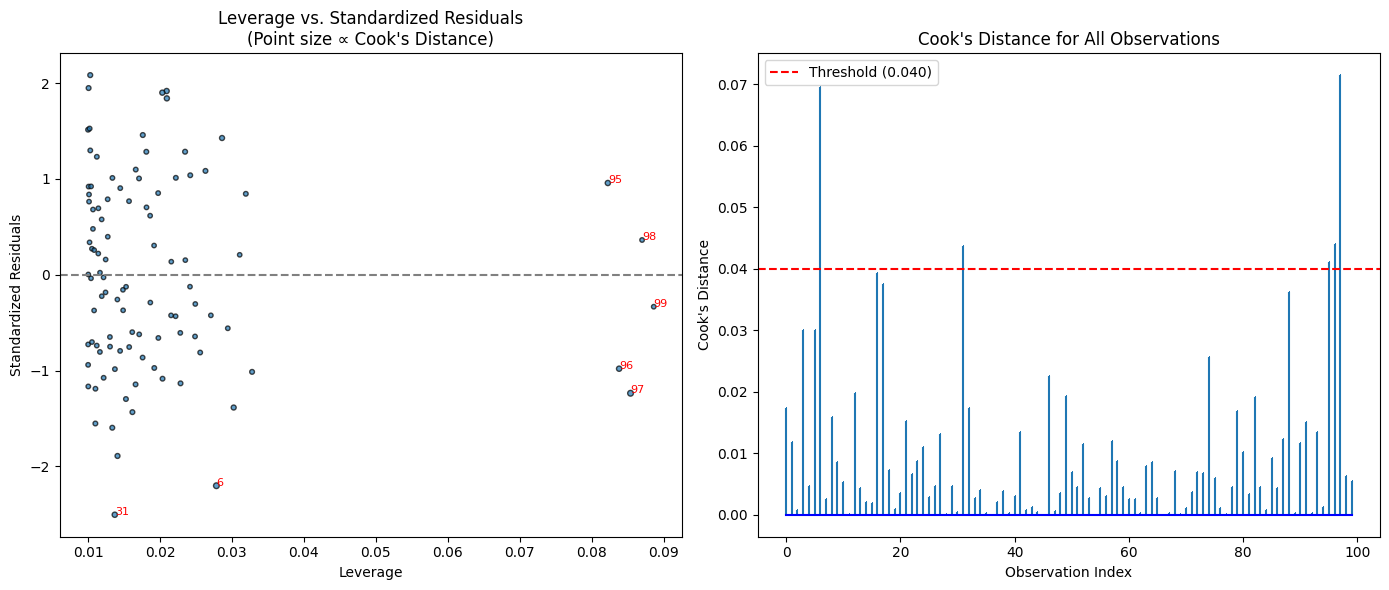

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ---------------------------------------------------
# 1. Simulate Data with a Few Influential Observations
# ---------------------------------------------------
np.random.seed(123)
n = 100
# Create a predictor x evenly spaced between 0 and 10.
x = np.linspace(0, 10, n)
# The true relationship: y = 2*x + noise.
noise = np.random.normal(0, 1, n)
y = 2 * x + noise

# Introduce a few influential observations by adding large errors to last few points.
x[95:] = x[95:] + 5    # Increase x-values for last few observations
y[95:] = y[95:] + 10   # Increase y-values for last few observations

# Build the DataFrame.
data = pd.DataFrame({'x': x, 'y': y})

# ---------------------------------------------------
# 2. Fit a Simple Linear Regression Model
# ---------------------------------------------------
# Add a constant to the predictor for the intercept.
X = sm.add_constant(data['x'])
model = sm.OLS(data['y'], X).fit()

# ---------------------------------------------------
# 3. Compute Influence Measures: Leverage and Cook's Distance
# ---------------------------------------------------
influence = model.get_influence()
# Leverage values (diagonal of the hat matrix)
leverage = influence.hat_matrix_diag
# Cook's Distance and its corresponding p-values
cooks_d, _ = influence.cooks_distance
# Standardized (studentized) residuals
standardized_resid = influence.resid_studentized_internal

# Attach the computed measures to the DataFrame
data['leverage'] = leverage
data['cooks_distance'] = cooks_d
data['standardized_resid'] = standardized_resid

# ---------------------------------------------------
# 4. Visualizations
# ---------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ---- (a) Leverage vs. Standardized Residuals Plot ----
# Here, the size of each point is scaled by its Cook's distance.
axs[0].scatter(data['leverage'], data['standardized_resid'],
               s=100 * data['cooks_distance'] + 10,  # larger size = higher Cook's distance
               alpha=0.7, edgecolors='k')
axs[0].set_xlabel("Leverage")
axs[0].set_ylabel("Standardized Residuals")
axs[0].set_title("Leverage vs. Standardized Residuals\n(Point size ∝ Cook's Distance)")
axs[0].axhline(0, color='gray', linestyle='--')

# Threshold for high leverage can be approximated as 2*(p)/n, where p is number of predictors including constant.
p = 2  # constant + one predictor
leverage_threshold = 2 * p / n

# Annotate observations with high leverage or large Cook's distance.
for idx, row in data.iterrows():
    if row['leverage'] > leverage_threshold or row['cooks_distance'] > 4 / n:
        axs[0].annotate(int(idx), (row['leverage'], row['standardized_resid']),
                        fontsize=8, color='red')

# ---- (b) Cook's Distance Plot ----
# Create a stem plot for Cook's distance for each observation.
axs[1].stem(np.arange(len(data)), data['cooks_distance'], markerfmt=",", basefmt="b-")
axs[1].set_xlabel("Observation Index")
axs[1].set_ylabel("Cook's Distance")
axs[1].set_title("Cook's Distance for All Observations")
# A common threshold for Cook's distance is 4/n.
cooks_threshold = 4 / n
axs[1].axhline(cooks_threshold, color='red', linestyle='--',
               label=f"Threshold ({cooks_threshold:.3f})")
axs[1].legend()

plt.tight_layout()
plt.show()

# Optional: Print the regression summary for reference.
# print(model.summary())


<h1 style='text-align: right;'>
تحلیل واریانس
</h1>


In [59]:
# @title Section 17: Variance Analysis
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 17: Variance Analysis
</div>
''')

First five rows of the data:
  Treatment Gender  BloodPressure
0   Control   Male     122.483571
1   Control   Male     119.308678
2   Control   Male     123.238443
3   Control   Male     127.615149
4   Control   Male     118.829233

Two-Way ANOVA Table:
                             sum_sq    df           F        PR(>F)
C(Treatment)            2397.159571   1.0  101.755562  1.134504e-15
C(Gender)                550.925986   1.0   23.385921  6.765707e-06
C(Treatment):C(Gender)     1.011833   1.0    0.042951  8.363724e-01
Residual                1790.409520  76.0         NaN           NaN


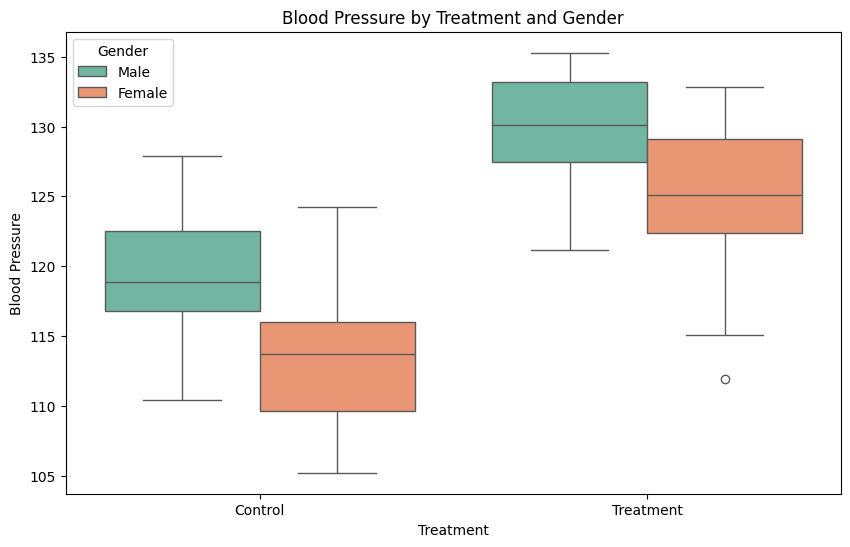

/tmp/ipython-input-1015466155.py:73: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='Treatment', y='BloodPressure', hue='Gender', data=df,


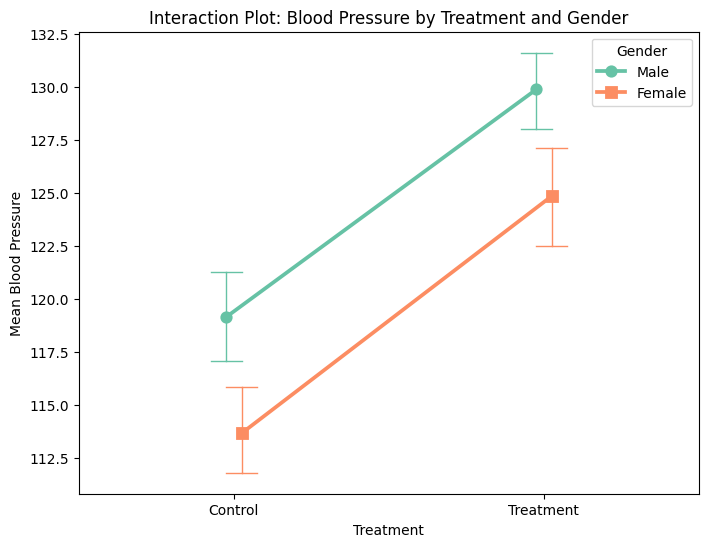

In [60]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 1. Generate Synthetic Data
# =====================================
# For each cell combination, we generate 20 observations.
np.random.seed(42)
n = 20   # observations per cell
treatments = ['Control', 'Treatment']
genders = ['Male', 'Female']

data_list = []
for treatment in treatments:
    for gender in genders:
        # Assign a mean blood pressure for each group
        # For example:
        if treatment == 'Control' and gender == 'Male':
            mean = 120
        elif treatment == 'Control' and gender == 'Female':
            mean = 115
        elif treatment == 'Treatment' and gender == 'Male':
            mean = 130
        elif treatment == 'Treatment' and gender == 'Female':
            mean = 125

        # Generate n data points from a normal distribution with SD = 5
        values = np.random.normal(loc=mean, scale=5, size=n)
        for value in values:
            data_list.append((treatment, gender, value))

# Create a DataFrame with the synthetic data.
df = pd.DataFrame(data_list, columns=['Treatment', 'Gender', 'BloodPressure'])
print("First five rows of the data:")
print(df.head())

# =====================================
# 2. Fit a Two-Way ANOVA Model
# =====================================
# Using the formula interface, we include both main effects and the interaction effect.
model = smf.ols('BloodPressure ~ C(Treatment) * C(Gender)', data=df).fit()

# Generate the ANOVA table (Type II sums-of-squares is typically used for balanced designs)
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA Table:")
print(anova_table)

# Explanation:
# The ANOVA table displays for each effect (Treatment, Gender, and their interaction)
# the Sum of Squares (SS), degrees of freedom (df), Mean Square (MS), and the F statistic.
# The F statistic is computed as F = MS_effect / MS_Error.
# A significant F (with a p-value less than a chosen alpha, typically 0.05)
# indicates that the groups (or the factor levels) have significantly different means.

# =====================================
# 3. Visualization
# =====================================
# First, plot a boxplot to visualize the distribution of blood pressure across groups.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Treatment', y='BloodPressure', hue='Gender', data=df, palette='Set2')
plt.title('Blood Pressure by Treatment and Gender')
plt.xlabel('Treatment')
plt.ylabel('Blood Pressure')
plt.show()

# Next, create an interaction plot to show the mean blood pressure for each treatment,
# with separate lines for each gender. This helps visualize both main effects and any interaction.
plt.figure(figsize=(8, 6))
sns.pointplot(x='Treatment', y='BloodPressure', hue='Gender', data=df,
              dodge=True, markers=["o", "s"], capsize=.1, errwidth=1, palette="Set2")
plt.title('Interaction Plot: Blood Pressure by Treatment and Gender')
plt.xlabel('Treatment')
plt.ylabel('Mean Blood Pressure')
plt.legend(title='Gender')
plt.show()


<h1 style='text-align: right;'>
آزمون ناپارامتری
</h1>


In [61]:
# @title Section 17: Mann-Whitney U Test
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 17: Mann-Whitney U Test
</div>
''')

/tmp/ipython-input-3444203059.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=data, palette='Set2')


Mann-Whitney U Statistic: 370.00
P-value: 0.2398
Fail to reject the null hypothesis (H0). There is no statistically significant difference between the two groups.


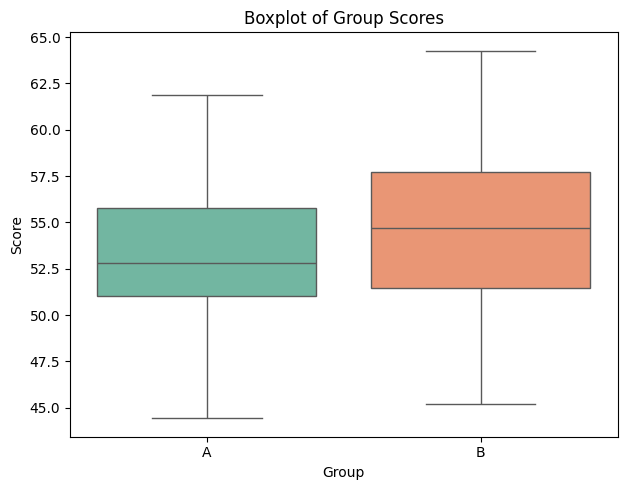

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# ------------------------------
# 1. Generate Synthetic Data
# ------------------------------
# We generate data for two groups:
# Group A is drawn from a normal-like distribution centered at 50.
# Group B is drawn from a normal-like distribution centered at 55.
# Note that the Mann‑Whitney U test is non-parametric and compares the ranks,
# serving as a proxy for differences in central tendencies (such as the medians).

np.random.seed(42)
n = 30  # number of observations per group
group_A = np.random.normal(loc=54, scale=5, size=n)
group_B = np.random.normal(loc=55, scale=5, size=n)

# Combine the data into a DataFrame for plotting
data = pd.DataFrame({
    'Score': np.concatenate([group_A, group_B]),
    'Group': ['A'] * n + ['B'] * n
})

# ------------------------------
# 2. Perform the Mann-Whitney U Test
# ------------------------------
# Using the 'two-sided' alternative hypothesis to test if the two groups differ.
u_statistic, p_value = mannwhitneyu(group_A, group_B, alternative='two-sided')
alpha = 0.05  # significance level

print(f"Mann-Whitney U Statistic: {u_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a statistically significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis (H0). There is no statistically significant difference between the two groups.")

# ------------------------------
# 3. Visualize the Data
# ------------------------------
# Boxplot to show the spread and medians of the groups.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='Score', data=data, palette='Set2')
plt.title('Boxplot of Group Scores')
plt.xlabel('Group')
plt.ylabel('Score')


plt.tight_layout()
plt.show()
